<h1>Second Assignment<h1>

## Dataset

In this homework, we will use the California Housing Prices from Kaggle.

In [1]:
# importing the required libraries
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In this homework, we will use the New York City Airbnb Open Data.
The goal of this homework is to create a regression model for prediction apartment prices (column 'price').

## EDA

- Load the data.
- Look at the price variable. Does it have a long tail?


## Features

For the rest of the homework, you'll need to use only these columns:

- 'latitude',
- 'longitude',
- 'housing_median_age',
- 'total_rooms',
- 'total_bedrooms',
- 'population',
- 'households',
- 'median_income',
- 'median_house_value'

In [2]:
# getting the data with wget command
#!python -m wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [3]:
# filtering out the columns to use
usecolumns = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']

In [4]:
# loading the data
df = pd.read_csv('housing.csv', usecols=usecolumns)
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0


In [5]:
df.shape

(20640, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### Look at the median_house_value variable. Does it have a long tail?

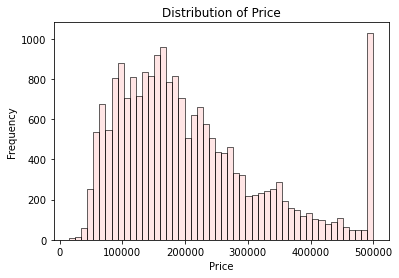

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(df.median_house_value, bins=50, alpha=0.1, color='red')
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of Price')
plt.show()

<b>Yes, It has a long tail<b>

## Question 1

#### Find a feature with missing values. How many missing values does it have?

In [8]:
df.isna().sum().sum()

207

## Question 2

#### What's the median (50% percentile) for variable 'minimum_nights'?

In [9]:
print(df['population'].quantile(q=0.5))

1166.0


## Split the data

- Shuffle the initial dataset, use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Make sure that the target value ('price') is not in your dataframe.
- Apply the log transformation to the price variable using the np.log1p() function.

In [10]:
# shuffling the data, using random seed 42
n = len(df)
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

In [11]:
# Spiltting the data into train(60%), validation(20%),test(20%)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - (n_val + n_test)
n_train, n_val, n_test,n

(12384, 4128, 4128, 20640)

In [12]:
# creating a copy, so as not to affect the main dataframe
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

In [13]:
# they still retain the same shape after copy
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [14]:
# resetting their index after shuffling and splitting
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
# creating y values. 
# y values are been extracted from df_(train, val, test)
y_train = df_train['median_house_value'].values
y_val = df_val['median_house_value'].values
y_test = df_test['median_house_value'].values

#### Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [16]:
# applying log transformation to the mean_house_value
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

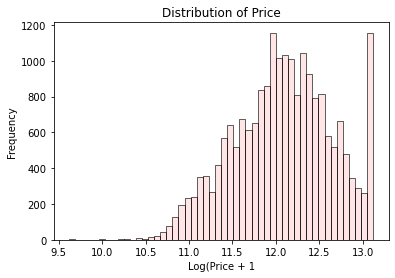

In [17]:
median_house_value_log = np.log1p(df.median_house_value)

plt.figure(figsize=(6,4))
sns.histplot(median_house_value_log, bins=50, alpha=0.1, color='red')
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1')
plt.title('Distribution of Price')
plt.show()

In [18]:
len(y_train), len(y_val), len(y_test)

(12384, 4128, 4128)

#### Make sure that the target value ('median_house_value') is not in your dataframe.

In [19]:
# deleting y vales from the df_(train, val, test) dataframe
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [20]:
# a function to calculate linear regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [21]:
# a function to fill NAN values
def fill_na(df, nan_values):
    df_new = df[base]
    df_new = df_new.fillna(nan_values)
    X = df_new.values
    return X

In [22]:
# function to calculate RMSE
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [23]:
base = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income'
]

In [24]:
# filling na's with mean
mean = df['total_bedrooms'].mean()

X_mean_train = fill_na(df_train, nan_values=mean)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)


X_mean_val = fill_na(df_val, nan_values=mean)
y_mean_pred_values = w_0_mean + X_mean_val.dot(w_mean) 


np.round(rmse(y_mean_pred_values, y_val),2)

0.33

In [25]:
# filling na's with zero's

X_zero_train = fill_na(df_train, nan_values=0)
w_0_mean, w_mean = train_linear_regression(X_zero_train, y_train)


X_zero_val = fill_na(df_val, nan_values=mean)
y_mean_pred_values = w_0_mean + X_zero_val.dot(w_mean) 


np.round(rmse(y_mean_pred_values, y_val),2)

0.33

## Question 4

In [26]:
# regularisation
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [28]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_zero_train = fill_na(df_train, nan_values=0)
    w_0, w = train_linear_regression_reg(X_zero_train, y_train, r=r)
    y_null_reg_val = w_0 + X_zero_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    print(r, w_0, rmse_val)

0 -11.686975241713945 0.33
1e-06 -11.686959175536973 0.33
0.0001 -11.685368865728282 0.33
0.001 -11.670931317955691 0.33
0.01 -11.528493585709429 0.33
0.1 -10.27450028206445 0.33
1 -4.920480897806387 0.33
5 -1.4820957456166344 0.34
10 -0.7899311832497746 0.34


## Question 5

In [29]:
rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    idx = np.arange(n)
    np.random.seed(r)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_null_train = fill_na(df_train, nan_values=0)
    w_0, w = train_linear_regression(X_null_train, y_train)
    
    X_null_val = fill_na(df_val, nan_values=0)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    
    rmse_list.append(rmse_val)
    
    print(r, w_0, rmse_val)

0 -11.900382139443327 0.34
1 -11.732757373641356 0.34
2 -11.806729361482834 0.33
3 -11.587900348548322 0.34
4 -11.389470588931385 0.34
5 -11.447114276367895 0.34
6 -11.37051635220625 0.35
7 -12.473448918967879 0.34
8 -11.800287430019978 0.35
9 -11.4590468309554 0.34


In [30]:
rmse_list

[0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.34, 0.35, 0.34]

In [31]:
np.round(np.std(rmse_list),3)

0.005

## Question 6

In [32]:
r = 9

idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
    
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()


# combining the train and valiadation df
frames = [df_train, df_val]
df_train_val = pd.concat(frames)


df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


y_train_val_orig = df_train_val.median_house_value.values
y_test_orig = df_test.median_house_value.values


y_train_val = np.log1p(y_train_val_orig)
y_test = np.log1p(y_test_orig)


del df_train_val['median_house_value']
del df_test['median_house_value']

In [33]:
X_null_train_val = fill_na(df_train_val, nan_values=0)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r=0.001)

X_null_test = fill_na(df_test, nan_values=0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test),2)

0.35